# Install library

In [ ]:
# install yfinance
!pip install yfinance

# Download Historical Data

In [1]:
"""
    Download Historical Data from Yahoo Finance
"""

import os
import sys
import time
import datetime

import pandas as pd
import yfinance as yf

def download_data(ticker, start_date, end_date, interval):
    """
        Download Historical Data from Yahoo Finance
    """
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


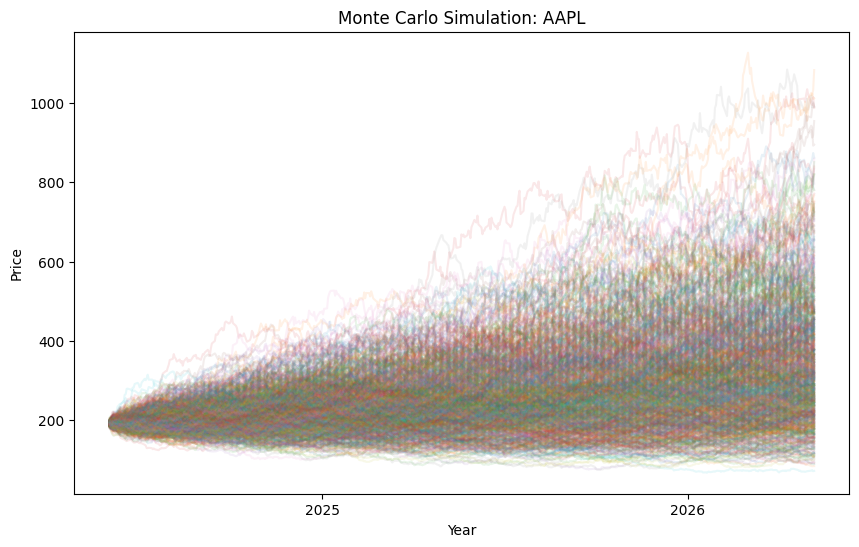

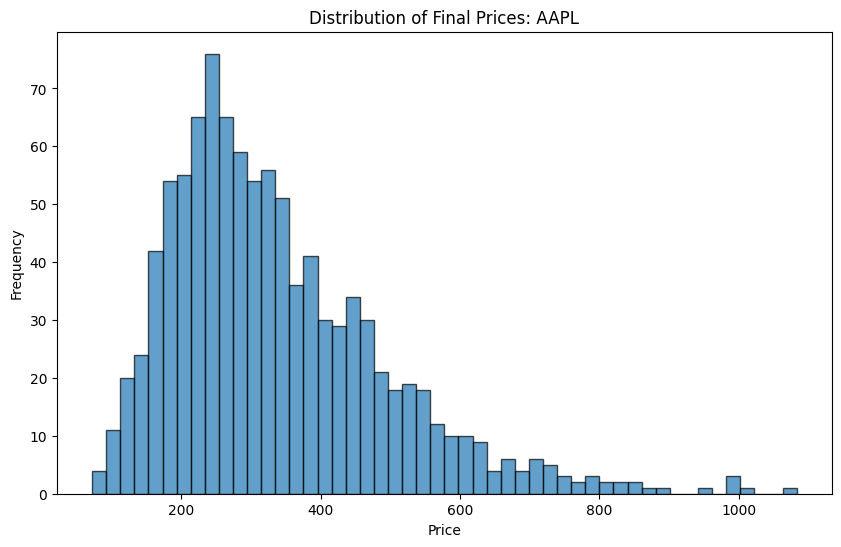

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def monte_carlo_simulation(ticker, start, end, num_simulations, predict_years):
    """
        Monte Carlo Simulation
    """
    # download historical data
    prices = download_data(ticker, start, end, '1d')
    
    # calculate daily returns
    daily_returns = prices['Adj Close'].pct_change().dropna()

    # calculate mean & standard deviation of daily returns
    mean_return = daily_returns.mean()
    std_dev = daily_returns.std()

    # number of days to predict
    days_to_predict = predict_years * 252  # assuming 252 trading days per year
    
    # generate random numbers based on normal distribution
    simulations = np.random.normal(loc=mean_return, 
                                   scale=std_dev,
                                   size=(num_simulations, days_to_predict))

    # calculate the simulated prices
    last_price = prices['Adj Close'].iloc[-1]
    simulated_prices = last_price * (1 + simulations).cumprod(axis=1)
    
    # Create date range for x-axis
    date_range = pd.date_range(start=pd.to_datetime(end), periods=days_to_predict, freq='B')
    
    # plot the simulation
    plt.figure(figsize=(10,6))
    plt.title('Monte Carlo Simulation: ' + ticker)
    
    for i in range(num_simulations):
        plt.plot(date_range, simulated_prices[i], alpha=0.1)
    
    # Format x-axis as year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
    
    # Extract the final prices for histogram
    final_prices = simulated_prices[:, -1]
    
    # plot the histogram of final prices
    plt.figure(figsize=(10,6))
    plt.hist(final_prices, bins=50, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Final Prices: ' + ticker)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# define stock tickers & date range
# tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']
tickers = ['AAPL']
start_date = '2020-01-01'
end_date = '2024-06-01'
predict_years = 2  # Number of years to predict

# number of simulations
num_simulations = 1000

# perform monte carlo simulation for each stock
for ticker in tickers:
    monte_carlo_simulation(ticker, start_date, end_date, num_simulations, predict_years)